#Imports

In [1]:
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#FasterRCNN Model

In [2]:
object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True)
object_detection_model.eval()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 84.3MB/s] 


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

##Testing on Sample Image

In [3]:
test_img = Image.open("/kaggle/input/test-img/test_img1.jpeg")

In [4]:
width, height = test_img.size
print("Dimensions of the image are ",width,"x",height)

Dimensions of the image are  612 x 408


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.3451, 0.3608, 0.3647,  ..., 0.0039, 0.0039, 0.0039],
         [0.3569, 0.3725, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         [0.3529, 0.3686, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.3020, 0.3098,  ..., 0.1216, 0.1176, 0.1137]],

        [[0.3216, 0.3373, 0.3373,  ..., 0.0039, 0.0039, 0.0039],
         [0.3333, 0.3490, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         [0.3294, 0.3451, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.2000, 0.2078,  ..., 0.0980, 0.0941, 0.0902]],

        [[0.2745, 0.2902, 0.2980,  ..., 0.0039, 0.0039, 0.0039],
         [0.2863, 0.3020, 0.3059,  ..., 0.0039, 0.0039, 0.0039],
         [0.2824, 0.2980, 0.3059,  ..., 0.0039, 0.0039, 0.

In [7]:
test_img_tensor.shape

torch.Size([3, 408, 612])

In [8]:
test_img_tensor =test_img_tensor.unsqueeze(dim=0)
test_img_tensor.shape

torch.Size([1, 3, 408, 612])

In [9]:
preds = object_detection_model(test_img_tensor)
preds

[{'boxes': tensor([[233.1602,  90.1161, 431.7190, 378.3868],
          [132.6686,  28.4824, 266.2517, 372.5308],
          [132.4319,  33.1351, 265.7532, 358.0820],
          [165.9607,  50.4178, 391.7910, 377.0103],
          [ 91.6329, 339.3947, 577.6117, 404.5926],
          [110.4094,  15.6220, 365.4836, 386.3338],
          [ 75.3653,  43.4748, 465.1440, 384.1267],
          [449.6492, 138.6353, 511.3659, 230.7051],
          [100.3299, 336.6240, 575.0822, 403.4710],
          [ 76.5190, 311.2625, 602.2323, 406.8243],
          [ 86.3867,  53.3879, 464.1669, 401.0291],
          [432.8774,  57.3133, 553.9104, 231.8739],
          [ 58.9642, 189.5839, 603.5836, 405.9199]], grad_fn=<StackBackward0>),
  'labels': tensor([18, 17, 24, 17, 81, 62, 15, 62,  3, 15, 63,  1, 15]),
  'scores': tensor([0.9957, 0.9864, 0.4003, 0.1255, 0.1179, 0.1073, 0.1053, 0.0720, 0.0707,
          0.0690, 0.0686, 0.0583, 0.0542], grad_fn=<IndexBackward0>)}]

#Visualizing Our Prediction

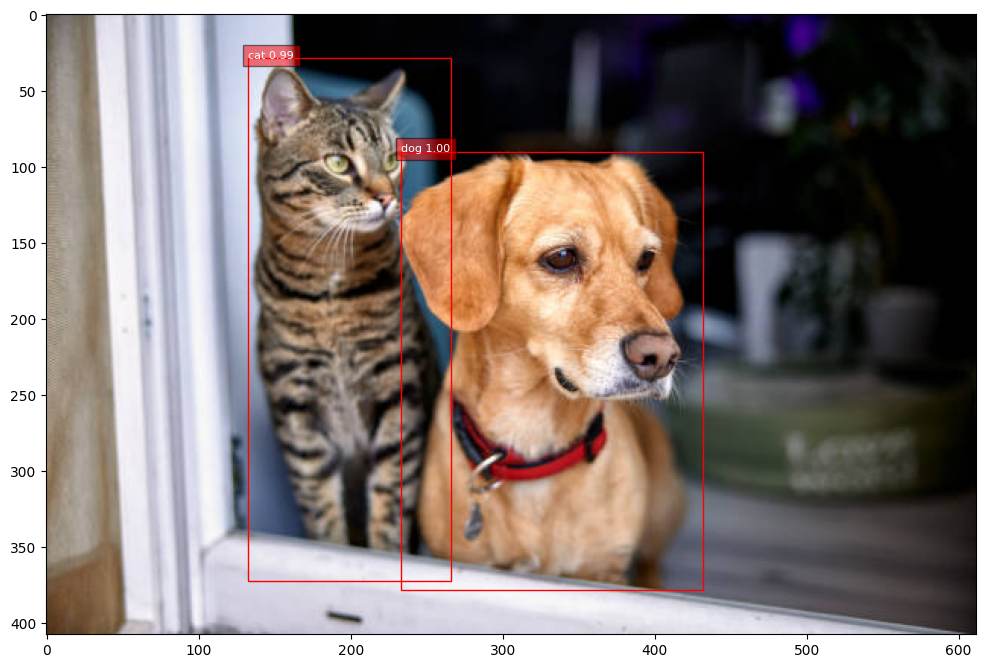

In [10]:
COCO_INSTANCE_LABEL_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
img = test_img_tensor.squeeze().detach().cpu().numpy()
img = img.transpose(1,2,0)
CONFIDENCE_THRESHOLD = 0.8
fig,ax = plt.subplots(1, figsize=[12,9])
plt.imshow(img)

for box, label, score in zip(preds[0]['boxes'],preds[0]['labels'],preds[0]['scores']):
  x1,y1,x2,y2 = box.detach().cpu().numpy()
  label_name = COCO_INSTANCE_LABEL_NAMES[label.item()]
  if score>CONFIDENCE_THRESHOLD:
    rect = patches.Rectangle([x1,y1],x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.text(x1,y1,f'{label_name} {score.item():.2f}', color='white',fontsize=8,bbox=dict(facecolor='red',alpha=0.5))

#YOLOv8

In [11]:
!pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 12.9 MB/s eta 0:00:00a 0:00:01


In [12]:
from ultralytics import YOLO
!yolo predict model=yolov8n.pt source='/kaggle/input/test-img/test_img1.jpeg'

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 24.3MB/s]
Ultralytics YOLOv8.2.95 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /kaggle/input/test-img/test_img1.jpeg: 448x640 1 cat, 1 dog, 1 cup, 148.2ms
Speed: 10.0ms preprocess, 148.2ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


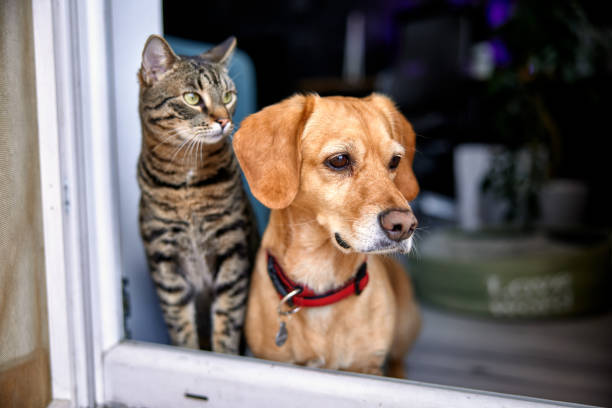

In [14]:
Image.open("/kaggle/input/test-img/test_img1.jpeg")